In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import gensim
from numpy import ndarray
from gensim import downloader

import re
import os
from os import listdir
from random import choices
from gensim import downloader
import nltk
from nltk.corpus import wordnet

In [15]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
# Load GloVe model (make sure you have the correct path to your GloVe file)
glove_model = downloader.load("glove-wiki-gigaword-50")

[==================================================] 100.0% 66.0/66.0MB downloaded


In [4]:
word2vec_vectors = downloader.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [7]:

# Function to pick random words from documents
def pick_words():
    docs: list[str] = []

    # Loop through files in the "data" directory
    for filename in listdir("data"):
        with open(f"data/{filename}", "r", encoding="utf-8") as file:
            for line in file:
                for word in line.split(" "):
                    match = re.match(r"(\w+)", word)

                    if match is not None and len(match.groups()) == 1:
                        docs.append(match[0])

    # Pick 75 random words from the list
    words = choices(docs, k=75)

    return words

Words for clustering: ['Forest', 'Mountain', 'River', 'Ocean', 'Desert', 'Glacier', 'Tree', 'Volcano', 'Meadow', 'Canyon', 'Wildlife', 'Rainforest', 'Valley', 'Waterfall', 'Sky', 'Grassland', 'Reef', 'Coral', 'Sunflower', 'Cloud', 'Lake', 'Volcano', 'Earthquake', 'Horizon', 'Soil', 'Neural', 'Blockchain', 'Algorithm', 'Cloud', 'Cybersecurity', 'Quantum', 'Augmented', 'Machine', 'Robotics', 'Data', 'IoT', 'Software', 'Hardware', 'App', 'Network', 'Virtual', 'Encryption', 'Bigdata', 'Database', 'Internet', 'Automation', 'Processor', 'Digital', 'Web', 'Server', 'Painting', 'Sculpture', 'Photography', 'Drawing', 'Music', 'Dance', 'Theater', 'Poetry', 'Film', 'Architecture', 'Sketch', 'Mural', 'Calligraphy', 'Graffiti', 'Collage', 'Printmaking', 'Design', 'Literature', 'Color', 'Abstract', 'Portrait', 'Installation', 'Canvas', 'Performance', 'Creativity']
Filtered words: ['forest', 'mountain', 'river', 'ocean', 'desert', 'glacier', 'tree', 'volcano', 'meadow', 'canyon', 'wildlife', 'rainfor

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Representative word for cluster is:  calligraphy
Representative word for cluster is:  waterfall
Representative word for cluster is:  app


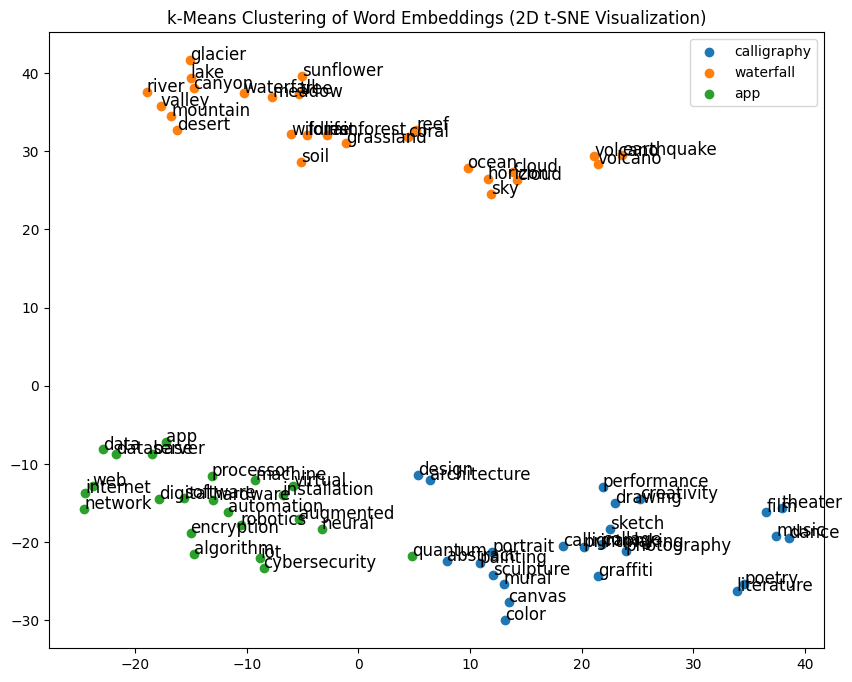

In [53]:
# Define words for clustering
# words_for_clustering = pick_words()

words_for_clustering = [
    'Forest', 'Mountain', 'River', 'Ocean', 'Desert',
    'Glacier', 'Tree', 'Volcano', 'Meadow', 'Canyon',
    'Wildlife', 'Rainforest', 'Valley', 'Waterfall', 'Sky',
    'Grassland', 'Reef', 'Coral', 'Sunflower', 'Cloud',
    'Lake', 'Volcano', 'Earthquake', 'Horizon', 'Soil',
    'Neural', 'Blockchain', 'Algorithm', 'Cloud', 'Cybersecurity',
    'Quantum', 'Augmented', 'Machine', 'Robotics', 'Data',
    'IoT', 'Software', 'Hardware', 'App', 'Network',
    'Virtual', 'Encryption', 'Bigdata', 'Database', 'Internet',
    'Automation', 'Processor', 'Digital', 'Web', 'Server',
    'Painting', 'Sculpture', 'Photography', 'Drawing', 'Music',
    'Dance', 'Theater', 'Poetry', 'Film', 'Architecture',
    'Sketch', 'Mural', 'Calligraphy', 'Graffiti', 'Collage',
    'Printmaking', 'Design', 'Literature', 'Color', 'Abstract',
    'Portrait', 'Installation', 'Canvas', 'Performance', 'Creativity']



print("Words for clustering:", words_for_clustering)

# Filter words that are present in the GloVe model
filtered_words = [word.lower() for word in words_for_clustering if word.lower() in glove_model]

print("Filtered words:", filtered_words)

# Extract word vectors for the filtered words
word_vectors_cluster = np.array([glove_model[word] for word in filtered_words], dtype=ndarray)

print(word_vectors_cluster)

# Apply k-Means clustering on the full-dimensional vectors
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # n_init ensures stable results
kmeans.fit(word_vectors_cluster)

# Get the cluster labels for each word
labels = kmeans.labels_

# Reduce the dimensionality to 2 using t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=3, n_iter=1000)  # Adjust perplexity and iterations as needed
reduced_vectors = tsne.fit_transform(word_vectors_cluster)

# Plot the result with different colors for each cluster
plt.figure(figsize=(10, 8))
for i in range(3):
    # Select words belonging to the current cluster
    cluster_words = [filtered_words[j] for j in range(len(filtered_words)) if labels[j] == i]
    cluster_vectors = reduced_vectors[labels == i]

    print("Representative word for cluster is: ", cluster_words[len(cluster_words)//2])

    # Finding hypernyms
    syn = None
    index = len(cluster_words)//2
    while((wordnet.synsets(cluster_words[index]) == 0 and index < len(cluster_words)) or syn is None):
      syn = wordnet.synsets(cluster_words[index])
      index = index + 1

    if len(syn) > 0:
      syn = wordnet.synsets(cluster_words[len(cluster_words)//2])[0]
      syn = syn.lemma_names()[0]
      # hypernyms = syn.hypernyms()
      # print("Hypernyms: ", hypernyms)
    else:
      syn = cluster_words[len(cluster_words)//2]

    # Plot points in the cluster
    plt.scatter(cluster_vectors[:, 0], cluster_vectors[:, 1], label=syn)

    # Annotate points with word labels
    for j, word in enumerate(cluster_words):
        plt.text(cluster_vectors[j, 0], cluster_vectors[j, 1], word, fontsize=12)

# Add title and legend
plt.title('k-Means Clustering of Word Embeddings (2D t-SNE Visualization)')
plt.legend()
plt.show()

Words for clustering: ['Forest', 'Mountain', 'River', 'Ocean', 'Desert', 'Glacier', 'Tree', 'Volcano', 'Meadow', 'Canyon', 'Wildlife', 'Rainforest', 'Valley', 'Waterfall', 'Sky', 'Grassland', 'Reef', 'Coral', 'Sunflower', 'Cloud', 'Lake', 'Volcano', 'Earthquake', 'Horizon', 'Soil', 'Neural', 'Blockchain', 'Algorithm', 'Cloud', 'Cybersecurity', 'Quantum', 'Augmented', 'Machine', 'Robotics', 'Data', 'IoT', 'Software', 'Hardware', 'App', 'Network', 'Virtual', 'Encryption', 'Bigdata', 'Database', 'Internet', 'Automation', 'Processor', 'Digital', 'Web', 'Server', 'Painting', 'Sculpture', 'Photography', 'Drawing', 'Music', 'Dance', 'Theater', 'Poetry', 'Film', 'Architecture', 'Sketch', 'Mural', 'Calligraphy', 'Graffiti', 'Collage', 'Printmaking', 'Design', 'Literature', 'Color', 'Abstract', 'Portrait', 'Installation', 'Canvas', 'Performance', 'Creativity']
Filtered words: ['Forest', 'Mountain', 'River', 'Ocean', 'Desert', 'Glacier', 'Tree', 'Volcano', 'Meadow', 'Canyon', 'Wildlife', 'Rainfor

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Representative word for cluster is:  Mural
Representative word for cluster is:  App
Representative word for cluster is:  Rainforest


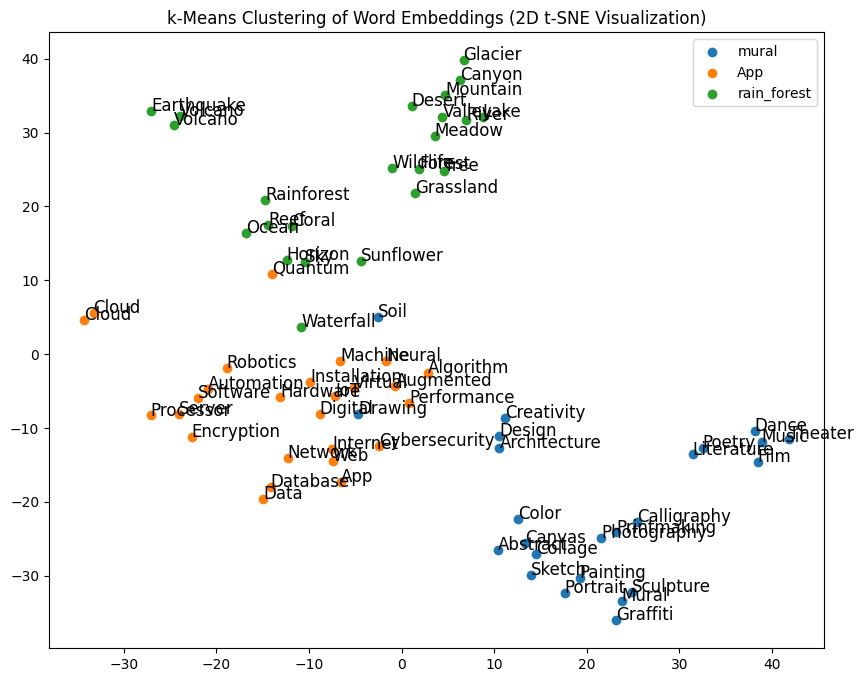

In [54]:
# Define words for clustering
# words_for_clustering = pick_words()

print("Words for clustering:", words_for_clustering)

# Filter words that are present in the GloVe model
filtered_words = [word for word in words_for_clustering if word in word2vec_vectors]

print("Filtered words:", filtered_words)

# Extract word vectors for the filtered words
word_vectors_cluster = np.array([word2vec_vectors[word] for word in filtered_words], dtype=ndarray)

print(word_vectors_cluster)

# Apply k-Means clustering on the full-dimensional vectors
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # n_init ensures stable results
kmeans.fit(word_vectors_cluster)

# Get the cluster labels for each word
labels = kmeans.labels_

# Reduce the dimensionality to 2 using t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=3, n_iter=1000)  # Adjust perplexity and iterations as needed
reduced_vectors = tsne.fit_transform(word_vectors_cluster)

# Plot the result with different colors for each cluster
plt.figure(figsize=(10, 8))
for i in range(3):
    # Select words belonging to the current cluster
    cluster_words = [filtered_words[j] for j in range(len(filtered_words)) if labels[j] == i]
    cluster_vectors = reduced_vectors[labels == i]

    print("Representative word for cluster is: ", cluster_words[len(cluster_words)//2])

    # Finding hypernyms
    syn = None
    index = len(cluster_words)//2
    while((wordnet.synsets(cluster_words[index]) == 0 and index < len(cluster_words)) or syn is None):
      syn = wordnet.synsets(cluster_words[index])
      index = index + 1

    if len(syn) > 0:
      syn = wordnet.synsets(cluster_words[len(cluster_words)//2])[0]
      syn = syn.lemma_names()[0]
      # hypernyms = syn.hypernyms()
      # print("Hypernyms: ", hypernyms)
    else:
      syn = cluster_words[len(cluster_words)//2]

    # Plot points in the cluster
    plt.scatter(cluster_vectors[:, 0], cluster_vectors[:, 1], label=syn)

    # Annotate points with word labels
    for j, word in enumerate(cluster_words):
        plt.text(cluster_vectors[j, 0], cluster_vectors[j, 1], word, fontsize=12)

# Add title and legend
plt.title('k-Means Clustering of Word Embeddings (2D t-SNE Visualization)')
plt.legend()
plt.show()